In [1]:
import ast
from textwrap import indent

from IPython.display import Javascript

from liblet import ANTLR, AnnotatedTreeWalker, Tree, pyast2tree

In [2]:
Tmp = ANTLR(r"""

grammar tmp;

main : expr EOF ;

expr 
   : <assoc=right> expr '^' expr // ^ operator is right associative
   | NUMBER
   ;

NUMBER
   : ('0' .. '9') + ('.' ('0' .. '9') +)?
   ;

WS
   : [ \r\n\t] + -> skip
   ;
   
""")

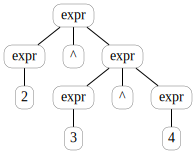

In [3]:
t = "2^3^4"
Tmp.tree(t, "expr", True)

In [4]:
from urllib.request import urlopen

def get(url):
    return urlopen(url).read().decode('utf-8')

In [5]:
from fractions import Fraction

Fraction(5/4/44)

Fraction(8188362958855447, 288230376151711744)

In [184]:
Arithmetic = ANTLR(r"""
grammar arithmetic;
ignoblebug: expression;

file_ : expression EOF;



expression                                               // TODO: parentesizzazione semplice efficiente
   : (PLUS | MINUS)? (INTEGER|RATIONAL)                  # atomExpression
   | <assoc=right>expression POW expression              # powExpression
   | (PLUS | MINUS) expression                           # unaryExpression
   | expression  (TIMES | DIV | FRACT)  expression       # divProdExpression
   | expression  (PLUS | MINUS) expression               # addSubExpression
   | GRAPH_L_PAREN expression GRAPH_R_PAREN              # subExpression
   ;


INTEGER   
   : NUMBER 
   ;
   
RATIONAL
    : NUMBER FRACT NUMBER
    ;


   
NUMBER
   : ('0' .. '9') + ('.' ('0' .. '9') +)?
   ;   
   
GRAPH_L_PAREN : '(' ;
GRAPH_R_PAREN : ')' ;
PLUS   : '+' ;
MINUS  : '-' ;
TIMES  : 'x' ;
DIV    : ':' ;
POINT  : '.' ;
POW    : '^' ;
FRACT  : '/' ;

WS
   : [ \r\n\t] + -> skip
   ;
   

""")

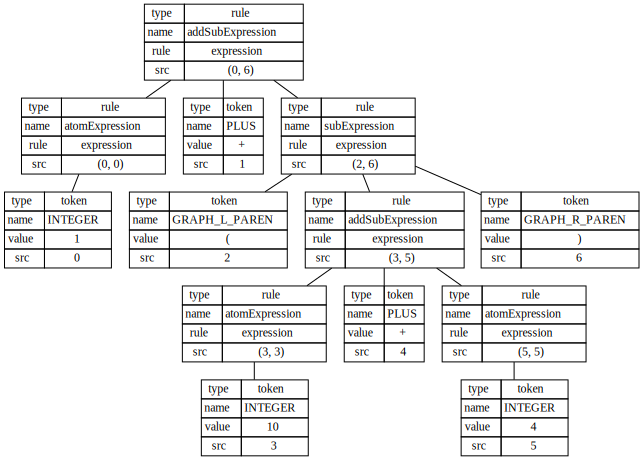

In [185]:
expr = """
1 + (10 + 4)
"""
ptree = Arithmetic.tree(expr, 'expression')
ptree

In [186]:
arith2ast = AnnotatedTreeWalker('name')

@arith2ast.register
def atomExpression(visit, ptree):
    child = ptree.children[0]
    print(child.root['name'])
    return Tree({'type': child.root['name'].lower(), 'value': child.root['value']}, [])

@arith2ast.register
def addSubExpression(visit, ptree):
    left, op, right = ptree.children
    return Tree({'type': 'addSubExpr', 'op': op.root['value']}, [visit(left), visit(right)])

@arith2ast.register
def subExpression(visit, ptree):
    _, subexpr, _ = ptree.children
    return visit(subexpr)
    

INTEGER
INTEGER
INTEGER


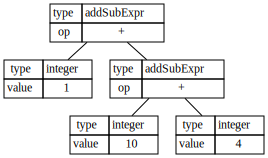

In [187]:
arith2ast(ptree)

In [188]:
atw_eval = AnnotatedTreeWalker('type', AnnotatedTreeWalker.RECOURSE_CHILDREN)

@arith2ast.register
def atomExpression(visit, ptree):
    child = ptree.children[0]
    print(child.root['name'])
    return Tree({'type': child.root['name'].lower(), 'value': child.root['value']}, [])

@arith2ast.register
def addSubExpression(visit, ptree):
    left, op, right = ptree.children
    return Tree({'type': 'addSubExpr', 'op': op.root['value']}, [visit(left), visit(right)])

@arith2ast.register
def subExpression(visit, ptree):
    _, subexpr, _ = ptree.children
    return visit(subexpr)